<a href="https://colab.research.google.com/github/22104071/GS_071/blob/main/EV_project_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Electric Vehicles Market Size Analysis**
---



In [8]:
import pandas as pd
ev_data = pd.read_csv("/Electric_Vehicle_Population_Data.csv")
print(ev_data.head())
ev_data.info()
ev_data.isnull().sum()
ev_data = ev_data.dropna()

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA        98122        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA        98021        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA        98109        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA        98027        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA        98392        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           291.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Vehicle 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

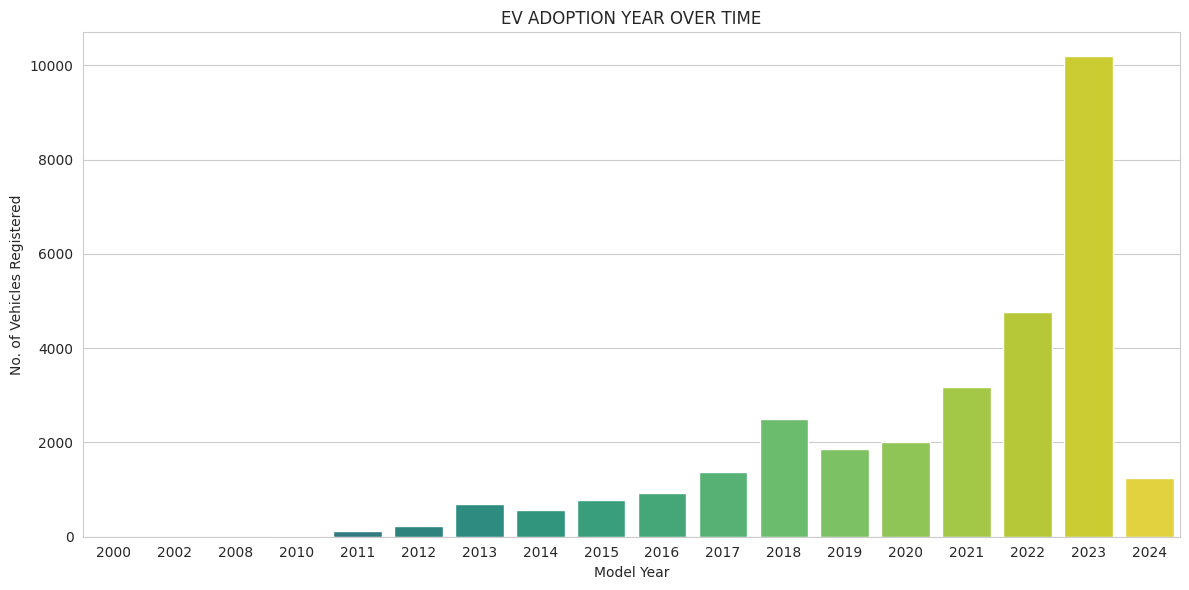

In [16]:
plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y = ev_adoption_by_year.values , legend=False,hue=ev_adoption_by_year.index, palette="viridis")
plt.title("EV ADOPTION YEAR OVER TIME")
plt.xlabel('Model Year')
plt.ylabel('No. of Vehicles Registered')
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

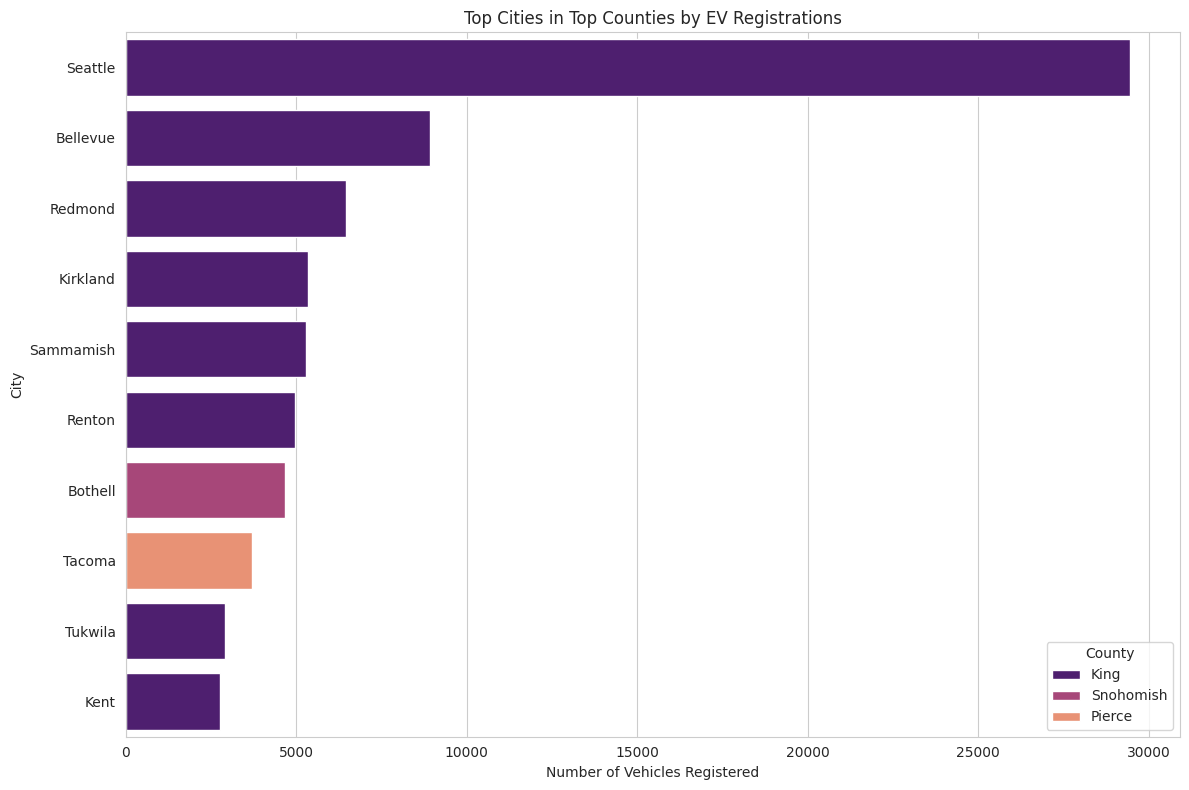

In [80]:
#geographical distribution at national level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

#Filtering out the datasets for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

#Analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name ='No. Of Vehicles')

#Visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize = (12,8))
sns.barplot(x = 'No. Of Vehicles',y = 'City',hue='County',data=top_cities, palette='magma')
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')

plt.tight_layout()
plt.show()


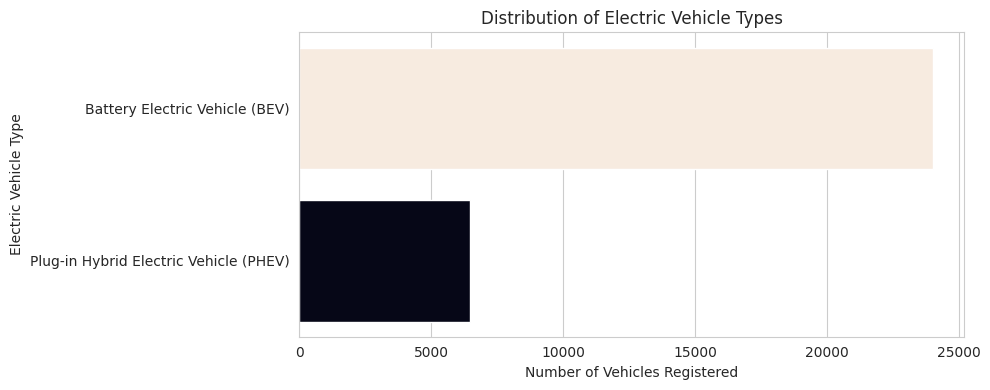

In [17]:
#Analyzing the distribution of electric vehicles types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,legend=False,hue=ev_type_distribution.values, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

In [19]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity


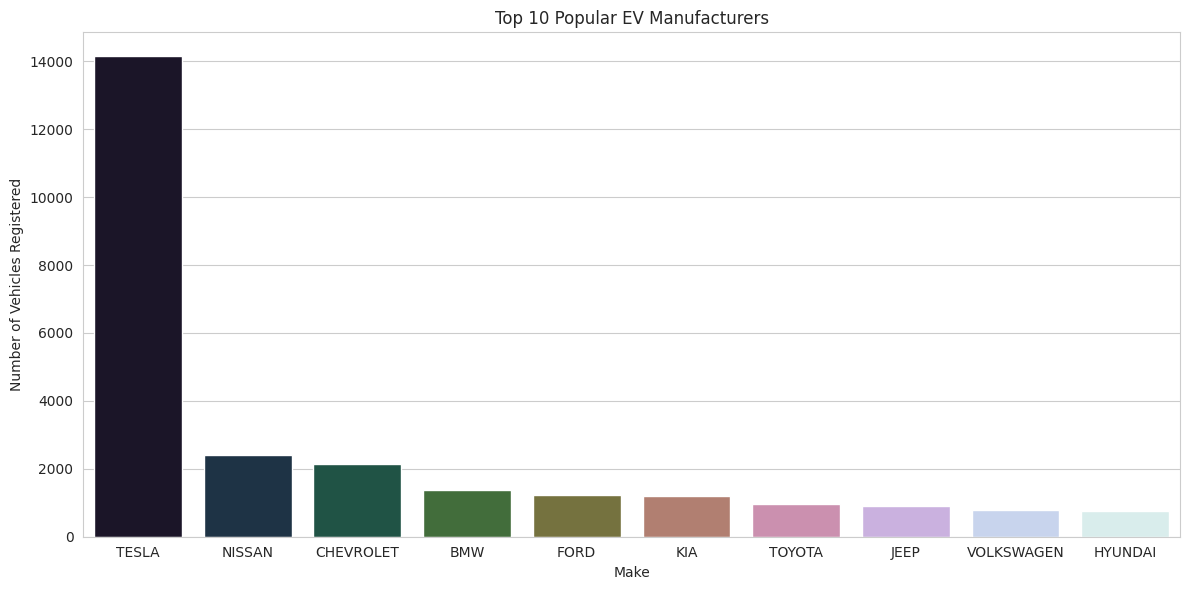

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(y=ev_make_distribution.values, x=ev_make_distribution.index,legend=False,hue=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Manufacturers')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles Registered')
plt.tight_layout()

plt.show()

In [34]:
#selecting the top 3 manufacturers based on no. of buyers
top_3_makes = ev_make_distribution.head(3).index

#filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

#Analyzing the popularity of EV models within these top manufacturers
ev_make_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='No. of Vehicles')

#visualizing the top 5 models across these manufacturers for clarity
top_models = ev_make_distribution_top_makes.head(5)

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='No. of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

NameError: name 'top_models' is not defined

<Figure size 1200x800 with 0 Axes>

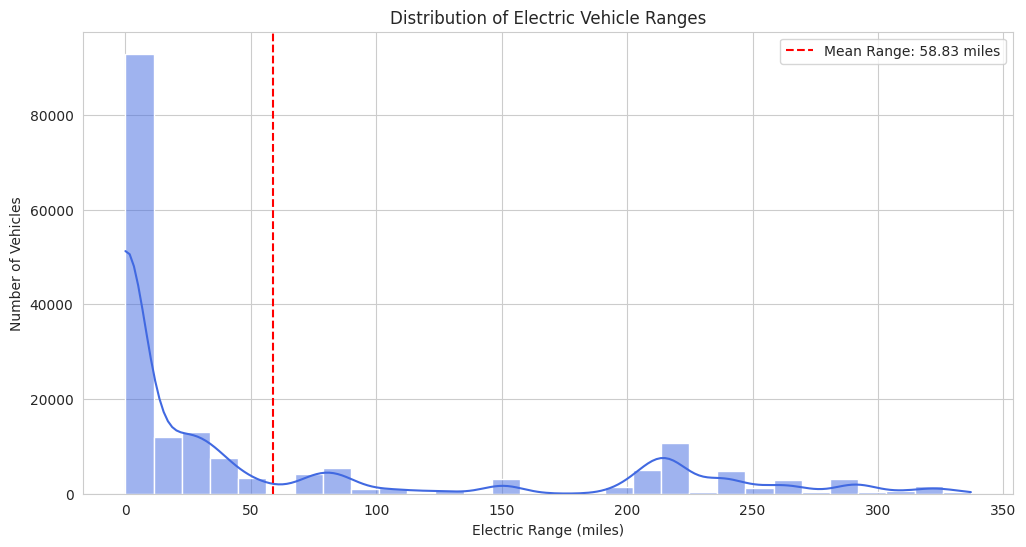

In [36]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

In [37]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()


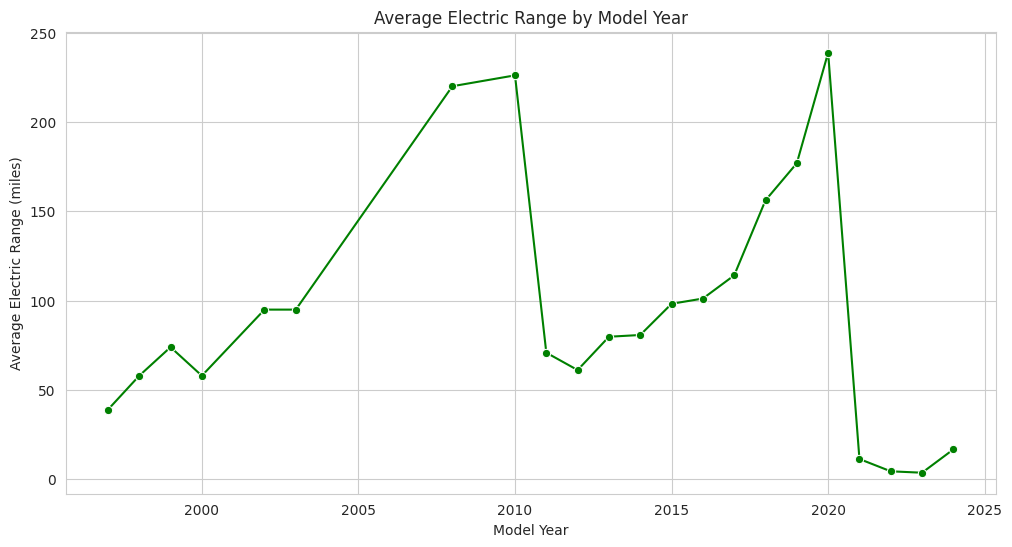

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [39]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

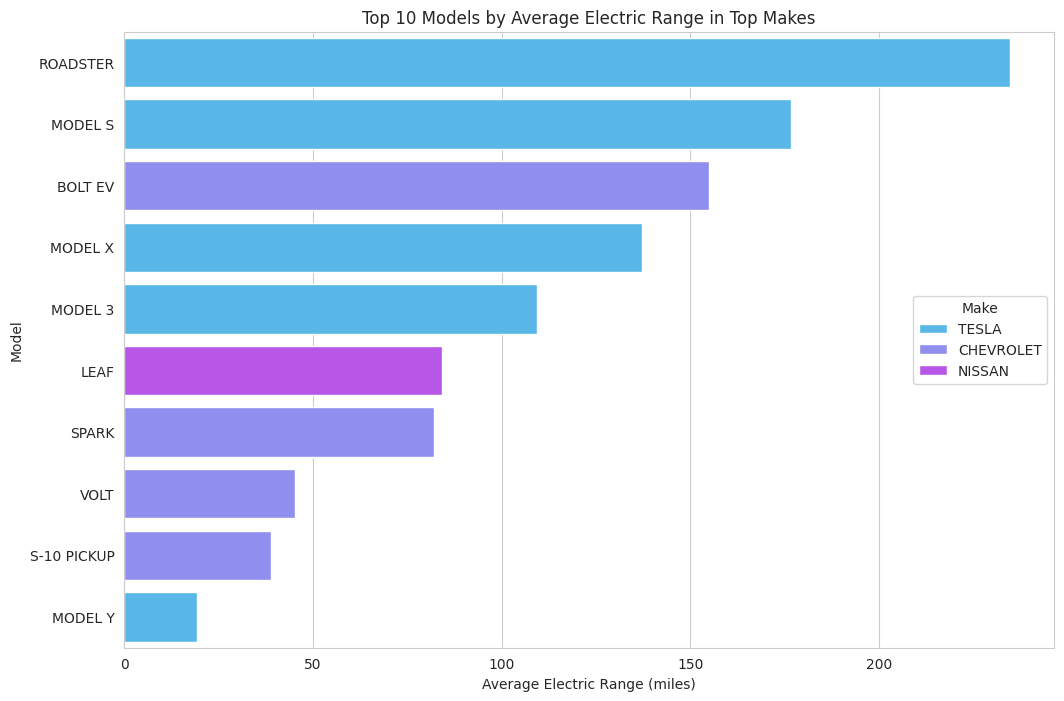

In [40]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

**Estimated Market Size Analysis of Electric Vehicles in the United States**
---



In [87]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts
print("No. of EV till date registered:",ev_registration_counts.sum())



No. of EV till date registered: 177473


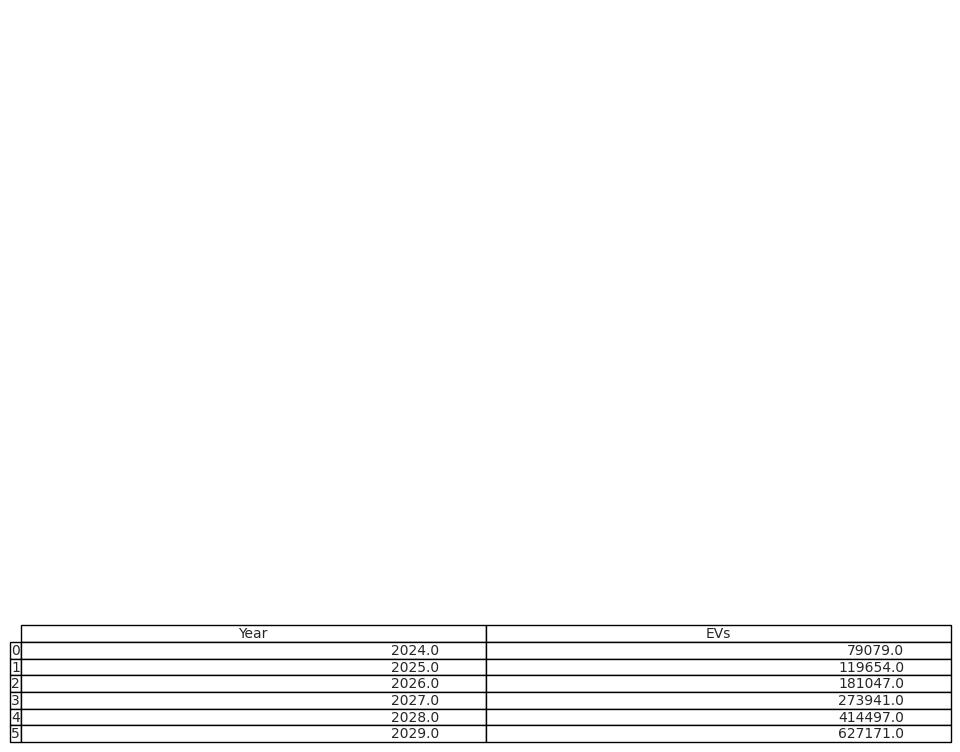

In [107]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = pd.DataFrame(zip(forecast_years + filtered_years.index.min(), np.round(forecasted_values)))
forecasted_evs.columns = ['Year', 'EVs']

#print(forecasted_evs)
from pandas.plotting import table
import matplotlib.pyplot as plt

# Create a table-like view
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
forecasted_evs = forecasted_evs.reset_index(drop=True)
table(ax, forecasted_evs)
plt.show()

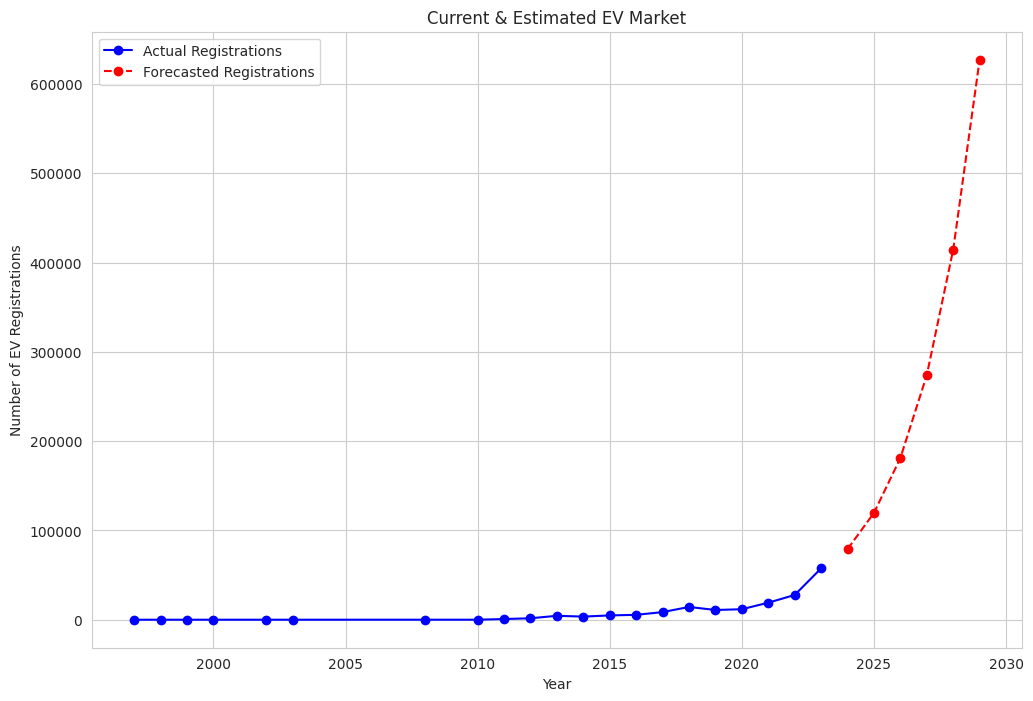

In [85]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()